In [450]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [452]:
from urllib.request import urlretrieve

In [454]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x27991d9b860>)

In [456]:
import pandas as pd

In [458]:
medical_df = pd.read_csv('medical.csv')

In [460]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.

The objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

In [463]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [466]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

In [469]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [471]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Age
Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot.

In [474]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

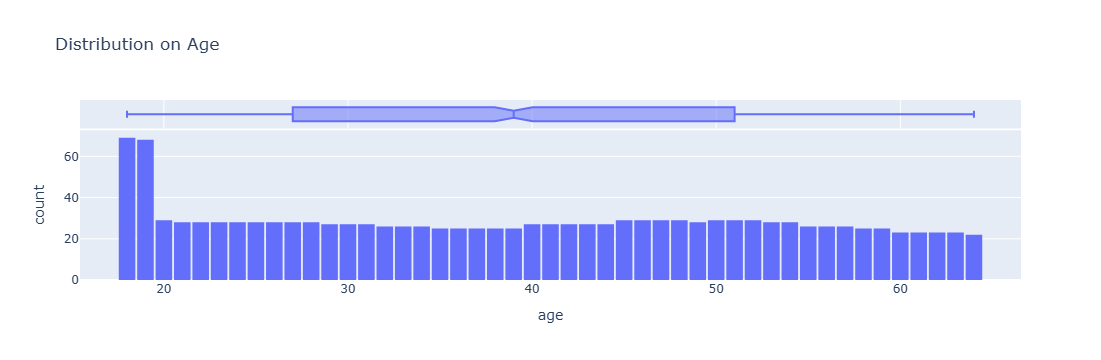

In [488]:
fig = px.histogram(medical_df, 
                   x = 'age',
                   marginal = 'box',    # This will plot a boxplot above the histogram
                   nbins = 47,
                   title = 'Distribution on Age')
fig.update_layout(bargap = 0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.

## Body Mass Index
We'll use a histogram and box plot to look at the distribution of BMI (Body Mass Index) of customers

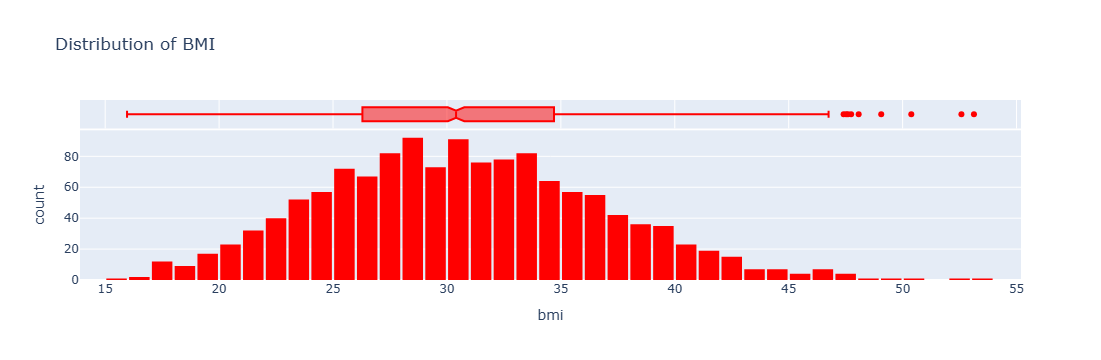

In [19]:
fig = px.histogram(medical_df, 
                   x = 'bmi',
                   marginal = 'box',  
                   color_discrete_sequence = ['red'],
                   title = 'Distribution of BMI')
fig.update_layout(bargap = 0.1)
fig.show()

The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right. 

## Charges
Charges is the column we're trying to predict. We'll use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

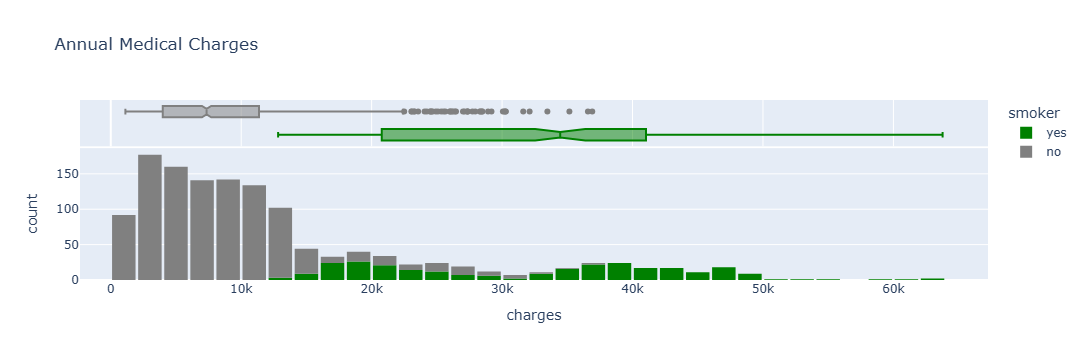

In [22]:
fig = px.histogram(medical_df, 
                   x = 'charges',
                   marginal = 'box',
                   color = 'smoker',
                   color_discrete_sequence = ['green', 'grey'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is 7300. The median for smokers is close to 35,000.

## Smoker
We'll visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [25]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

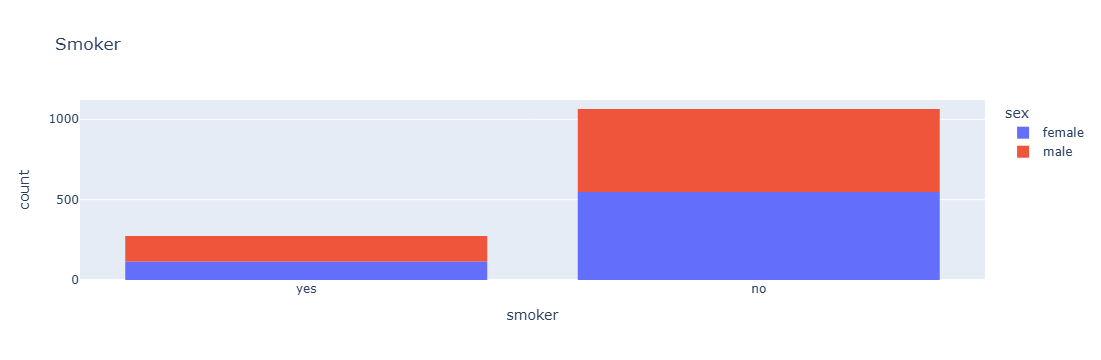

In [26]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker', height=650)

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males.

## Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

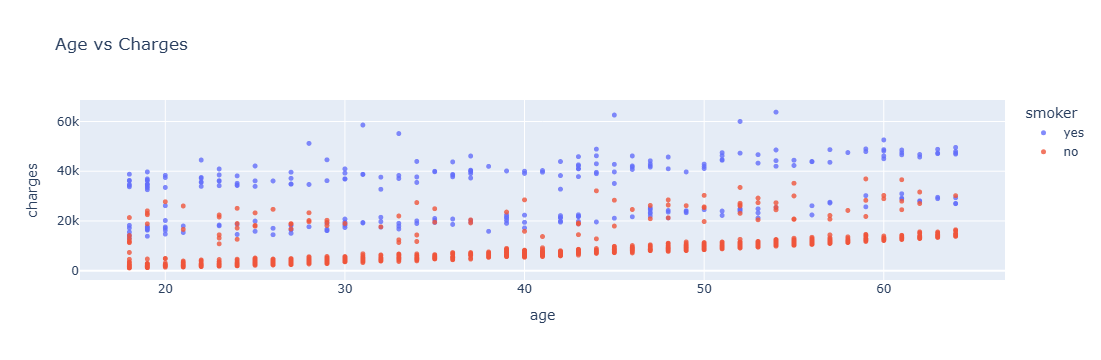

In [434]:
fig = px.scatter(medical_df, 
                   x = 'age',
                   y = 'charges',
                   color = 'smoker',
                   opacity = 0.8,
                   hover_data = ['sex'],   # hover_data is used to add the sex column to the tooltip
                   title = 'Age vs Charges')                
fig.update_traces(marker_size = 5)
fig.show()

We can make the following observations from the above chart:

- The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

- We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

    1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

    2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

    3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

## BMI and Charges
We'll visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

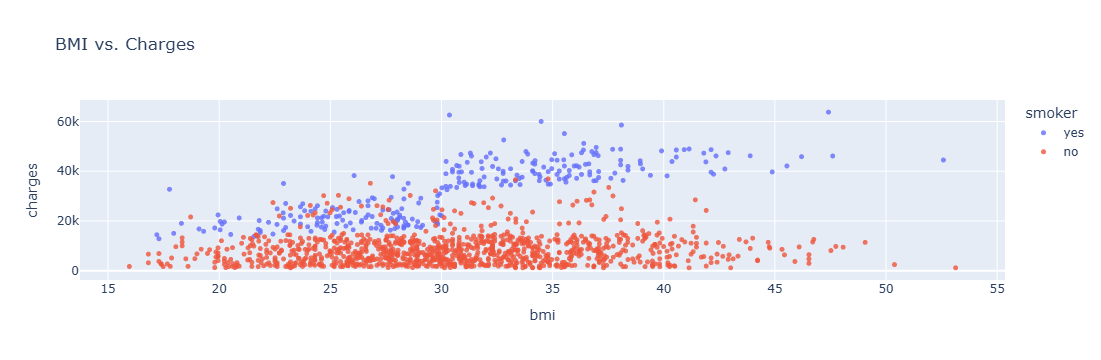

In [32]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

## Correlation
The values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

In [35]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [36]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362884

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [522]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)  # .map will apply our defined values to every value
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [498]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984767

In [528]:
# Compute correlation for numeric columns only
correlation_matrix = medical_df.select_dtypes(include=['number']).corr()
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

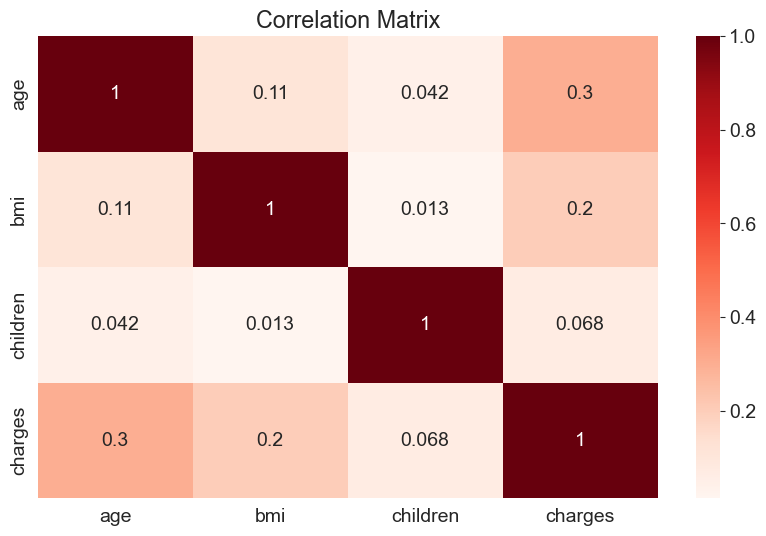

In [41]:
sns.heatmap(medical_df.select_dtypes(include=['number']).corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

## Linear Regression using a Single Feature
We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers.

In [43]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

visualizing the relationship between "age" and "charges"

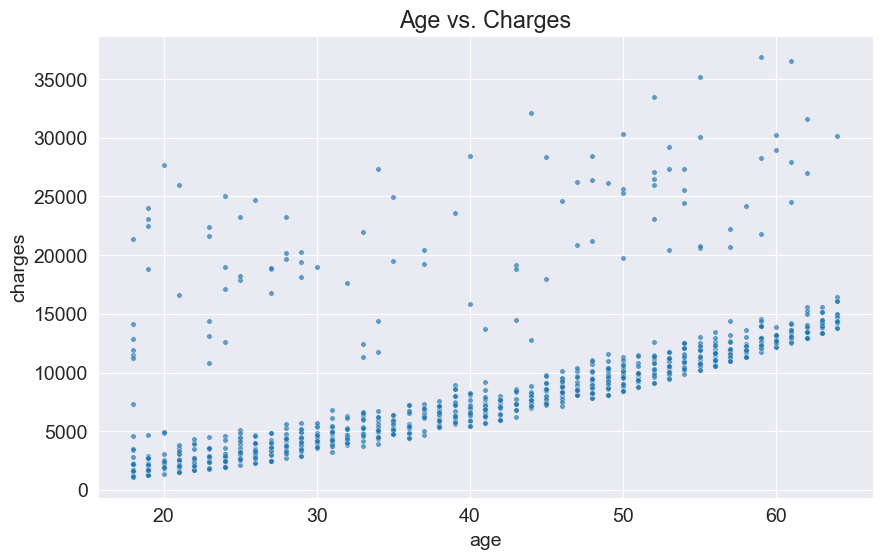

In [440]:
plt.title('Age vs. Charges')
sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 15);   # alpha here maintains the opacity of the points

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age.

In [62]:
import numpy as np

In [63]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

Let's compute the RMSE for our model with a sample set of weights

### Linear Regression using Scikit-learn
Let's use the LinearRegression class from scikit-learn to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

In [127]:
from sklearn.linear_model import LinearRegression, SGDRegressor

First, we create a new model object.

In [167]:
model = LinearRegression()

Next, we can use the `fit` method of the model to find the best fit line for the inputs and targets.

In [170]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

In [173]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print(f'inputs.shape: {inputs.shape}')
print(f'targets.shape: {targets.shape}')

inputs.shape: (1064, 1)
targets.shape: (1064,)


In [175]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

In [178]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

C:\Users\VIVEK\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

Let compute the predictions for the entire set of inputs

In [181]:
predictions = model.predict(inputs)

In [183]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Let's compute the RMSE loss to evaluate the model.

In [186]:
rmse(targets, predictions)

4662.505766636395

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [190]:
# w
model.coef_

array([267.24891283])

In [192]:
# b
model.intercept_

-2091.4205565650827

In [202]:
# Create Inputs and Targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges'] # The inputs need to be 2 dimensional, that's why we used [[]] instead of []

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [530]:
# Create Inputs and Targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


As seen here adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [208]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833271

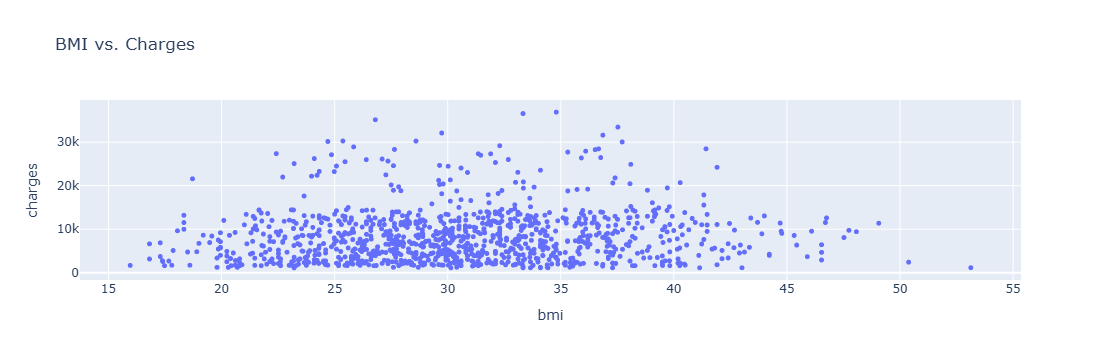

In [210]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title= 'BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can also visualize the relationship between all 3 variables "age", "bmi" and "charges" using a 3D scatter plot.

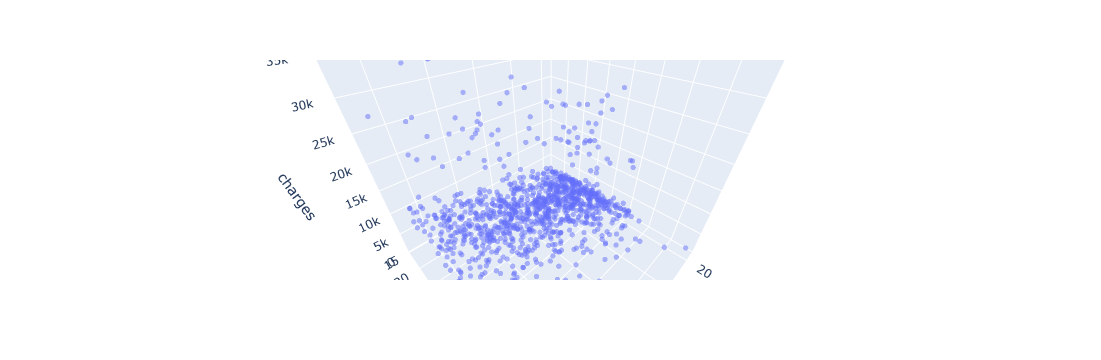

In [233]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

Let's also check the parameters of the model.

In [236]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488654)

Clearly, BMI has a much lower weightage, and you can see why. It has a tiny contribution, and even that is probably accidental. This is an important thing to keep in mind: you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply. 

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [240]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542197

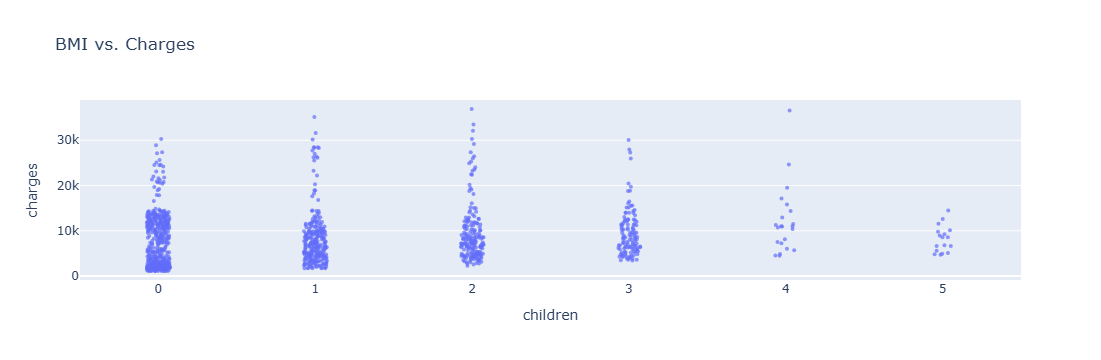

In [246]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= 'BMI vs. Charges')
fig.update_traces(marker_size=4, marker_opacity = 0.7)
fig.show()

In [248]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


In [283]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.

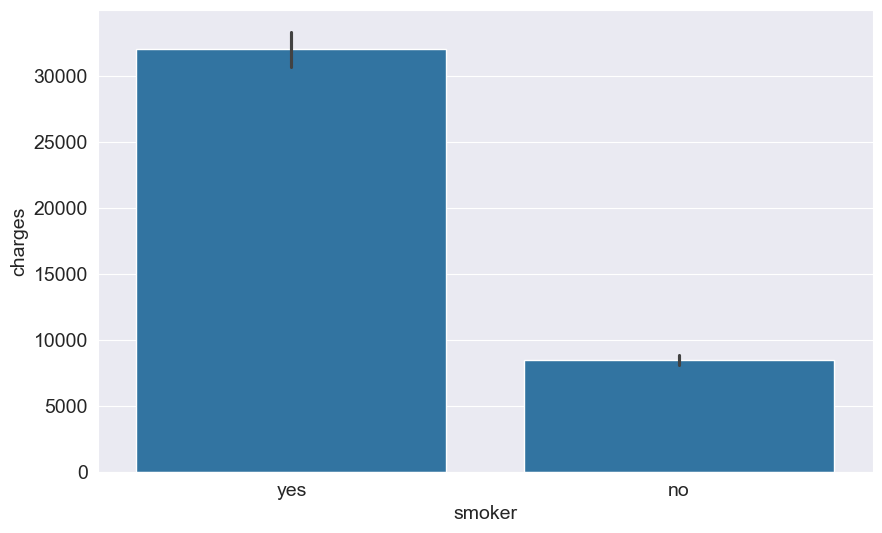

In [255]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [261]:
smoker_codes = {'no': 0, 'yes' : 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [269]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984767

In [273]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


We can now use the `smoker_df` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [276]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.


Let's try adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

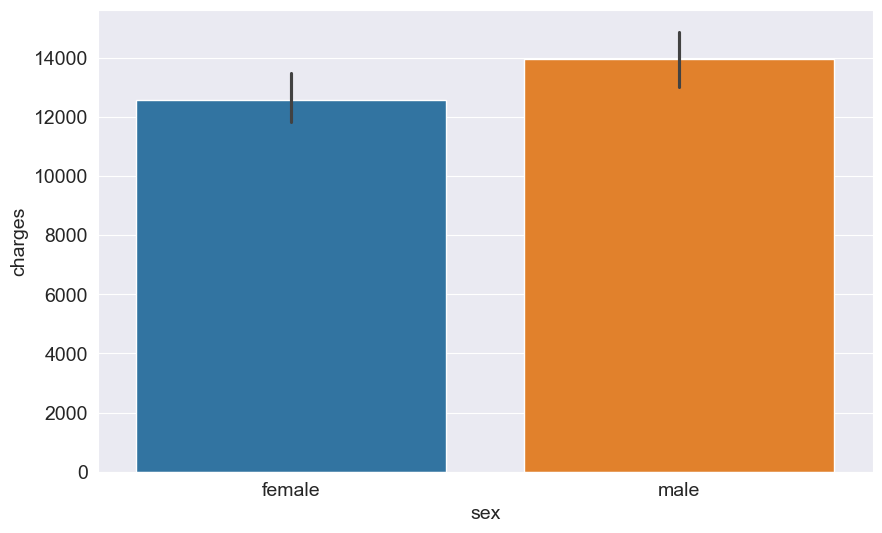

In [546]:
sns.barplot(data=medical_df, x='sex', y='charges', hue='sex');

In [309]:
sex_codes = {'female': 0, 'male': 1}

In [311]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [313]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025366

In [315]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [317]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


As you might expect, this does have a significant impact on the loss.

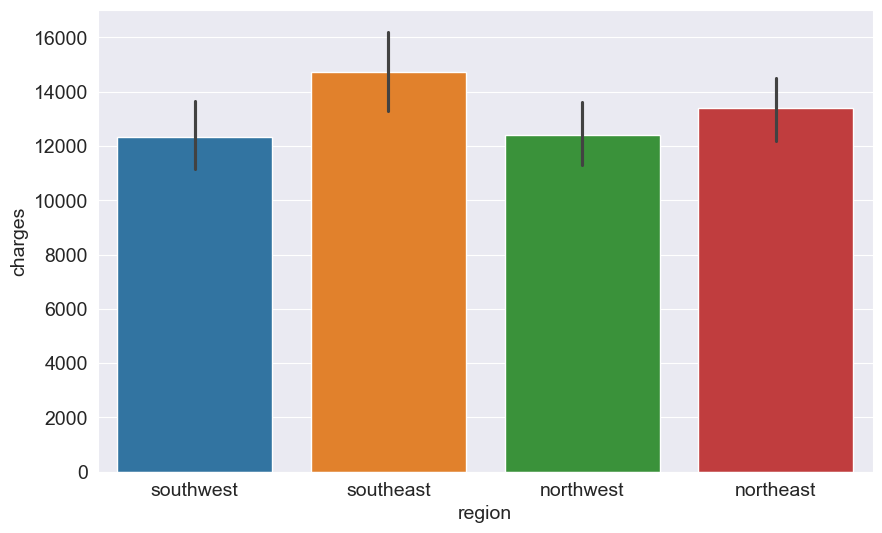

In [325]:
sns.barplot(data=medical_df, x='region', y='charges', hue='region');

In [329]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [333]:
medical_df[['region']]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [331]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [335]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot 

In [337]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [348]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights. 

In [351]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [353]:
model.intercept_

-12525.547811195444

In [363]:
weight_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weight_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [366]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [368]:
from sklearn.preprocessing import StandardScaler

In [372]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [376]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [378]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

We can now scale data as follows:

In [381]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [383]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [387]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6042.751556200273


We can now compare the weights in the formula:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [396]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
5,northeast,1.758467e+17
6,northwest,1.758467e+17
7,southeast,1.758467e+17
8,southwest,1.758467e+17
3,smoker_code,2.385276e+04
0,age,3.608872e+03
1,bmi,2.058490e+03
2,children,5.615551e+02
4,sex_code,-1.670010e+02
9,1,-1.758467e+17


As you can see now, the most important feature are:

1. Smoker
2. Age
3. BMI

In [401]:
from sklearn.model_selection import train_test_split

In [403]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size = 0.1)

In [412]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5805.632872941847


Let's compare this with the training loss.

In [415]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6070.050757855232
